# EDA Tools Agent

Exploratory Data Analysis is at the heart of data science. So we created the `EDA Tools Agent` to help you with your EDA. The `EDA Tools Agent` is a collection of tools that help you with your EDA:

- Missing Data with `missingno`
- EDA Reporting with `sweetviz`
- Correlation Analysis with `pytimetk` correlation funnel
- And more!

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [EDA Tools Agent](#eda-tools-agent)
2. [Load Libraries and Data](#load-libraries)
3. [Setup AI](#setup)
4. [Create The Agent](#create-the-agent)
5. [Usage](#usage)
    1. [What tools do you have access to?](#what-tools-do-you-have-access-to)
    2. [Get information on one of the agent's tools](#get-information-on-one-of-the-agents-tools)
6. [Tool Examples - How to use the agent's tools](#tool-examples)
    1. [Example 1: Describe data set tool](#example-1-describe-data-set-tool)
    2. [Example 2: Missing data tool](#example-2-missing-data-tool)
    3. [Example 3: Correlation Funnel Tool](#example-3-correlation-funnel-tool)
    4. [Example 4: Sweetviz Tool](#example-4-sweetviz-tool)
7. [Want To Become A Full-Stack Generative AI Data Scientist?](#want-to-become-a-full-stack-generative-ai-data-scientist)

### Load Libraries and Data <a id="load-libraries"></a>

We will load the libraries and data that we need for this notebook.

The dataset is the churn data from the `data` folder.

In [1]:
# Common
from langchain_openai import ChatOpenAI
import pandas as pd
import os
import yaml

# Agent
from ai_data_science_team.ds_agents import EDAToolsAgent

# Helper functions
from ai_data_science_team.utils.matplotlib import matplotlib_from_base64
from ai_data_science_team.utils.plotly import plotly_from_dict
from ai_data_science_team.utils.html import open_html_file_in_browser

# Data
df = pd.read_csv("data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Setup AI <a id="setup"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model="gpt-4o-mini")
llm


ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x7f7a60ac1120>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x7f7a60ac3a30>, root_client=<openai.OpenAI object at 0x7f7a803bbf70>, root_async_client=<openai.AsyncOpenAI object at 0x7f7a60ac1180>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `make_data_cleaning_agent()`.

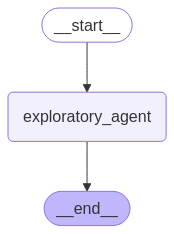

In [3]:
# Make a data loader agent
exploratory_agent = EDAToolsAgent(
    llm, 
    invoke_react_agent_kwargs={"recursion_limit": 10},
)
exploratory_agent

## Usage

Here are several examples of how to use the agent:


#### What tools do you have access to? Return a table.

In [4]:
exploratory_agent.invoke_agent("What tools do you have access to? Return a table.")

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * POST-PROCESSING EDA RESULTS


Here is a table of the tools I have access to:

| Tool Name                | Description                                                                                   |
|--------------------------|-----------------------------------------------------------------------------------------------|
| explain_data             | Provides a detailed narrative summary of a DataFrame, including its shape, types, and stats. |
| describe_dataset         | Computes and returns summary statistics for the dataset using pandas' describe() method.      |
| visualize_missing        | Conducts missing value analysis and generates visualizations for missing data.                |
| correlation_funnel       | Analyzes correlations using a funnel method, binarizing data against a target column.         |
| generate_sweetviz_report | Generates an Exploratory Data Analysis (EDA) report using the Sweetviz library.              |

#### Get information on one of the agent's tools.

In [5]:
exploratory_agent.invoke_agent("Give me information on the correlation funnel tool.")

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * POST-PROCESSING EDA RESULTS


The correlation funnel tool is designed to analyze the correlation between different features in a dataset, particularly focusing on a specified target variable. Here's an overview of its key components and functionality:

### Purpose
- The tool aims to identify how various features relate to a target variable, allowing for insights into which features might be influential or predictive in a given context.

### Key Parameters
1. **target**: 
   - This is the name of the target column that you want to analyze. The tool looks for columns that start with this target name followed by a double underscore (e.g., 'target__Category1', 'target__Category2').

2. **target_bin_index**:
   - This can be an integer or a string. If it's an integer, it selects the target level by position from the matching columns. If it's a string (like "Yes"), it matches to the suffix of a column name to determine which level of the target to analyze.

3. **corr_method**:
   - This specifies the method of correlation to use: 'pearson', 'kendall', or 'spearman'. The default method is 'pearson'.

4. **n_bins**:
   - The number of bins used for binarizing the data. The default is 4, which divides the data into four categories for analysis.

5. **thresh_infreq**:
   - This threshold determines what constitutes infrequent levels in the data. The default is set at 0.01, meaning any level occurring less than 1% of the time will be treated as infrequent.

6. **name_infreq**:
   - This is a label that can be applied to infrequent levels, with the default name set as '-OTHER'.

### Functionality
- The correlation funnel tool helps in visualizing and quantifying how features relate to the target variable, which can be particularly useful in exploratory data analysis (EDA).
- It can reveal patterns and relationships that may not be immediately obvious, thus aiding in feature selection and model development.

### Use Cases
- This tool can be especially useful in fields such as marketing, finance, and healthcare, where understanding the relationship between input features and outcomes is crucial for decision-making.

Overall, the correlation funnel tool is a valuable asset in data analysis, providing insights that can guide further analysis and modeling efforts.

## Tool Examples - How to use the agent's tools

#### Example 1: Explain data tool

In [12]:
exploratory_agent.invoke_agent(
    user_instructions="What are the first 5 rows of the data?",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: explain_data
    * POST-PROCESSING EDA RESULTS


Here are the first 5 rows of the dataset:

| customerID   | gender | SeniorCitizen | Partner | Dependents | tenure | PhoneService | MultipleLines     | InternetService | OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport | StreamingTV | StreamingMovies | Contract        | PaperlessBilling | PaymentMethod               | MonthlyCharges | TotalCharges | Churn |
|--------------|--------|---------------|---------|------------|--------|--------------|--------------------|-----------------|----------------|--------------|------------------|-------------|-------------|-----------------|------------------|------------------|------------------------------|----------------|--------------|-------|
| 7590-VHVEG   | Female | 0             | Yes     | No         | 1      | No           | No phone service    | DSL             | No             | Yes          | No               | No          | No          | No              | Month-to-month   | Yes              | Electronic check             | 29.85          | 29.85        | No    |
| 5575-GNVDE   | Male   | 0             | No      | No         | 34     | Yes          | No                 | DSL             | Yes            | No           | Yes              | No          | No          | No              | One year         | No               | Mailed check                  | 56.95          | 1889.5       | No    |
| 3668-QPYBK   | Male   | 0             | No      | No         | 2      | Yes          | No                 | DSL             | Yes            | Yes          | No               | No          | No          | No              | Month-to-month   | Yes              | Mailed check                  | 53.85          | 108.15       | Yes   |
| 7795-CFOCW   | Male   | 0             | No      | No         | 45     | No           | No phone service    | DSL             | Yes            | No           | Yes              | Yes         | No          | No              | One year         | No               | Bank transfer (automatic)      | 42.30          | 1840.75      | No    |
| 9237-HQITU   | Female | 0             | No      | No         | 2      | Yes          | No                 | Fiber optic     | No             | No           | No               | No          | No          | No              | Month-to-month   | Yes              | Electronic check             | 70.70          | 151.65       | Yes   |

### Key Attributes:
- **customerID**: Unique identifier for each customer.
- **gender**: Gender of the customer.
- **SeniorCitizen**: Indicates if the customer is a senior citizen (1 for Yes, 0 for No).
- **Partner**: Indicates if the customer has a partner (Yes/No).
- **Dependents**: Indicates if the customer has dependents (Yes/No).
- **tenure**: Number of months the customer has been with the service.
- **Churn**: Indicates if the customer has churned (Yes/No).

#### Example 2: Describe data set tool

In [6]:
exploratory_agent.invoke_agent(
    user_instructions="Describe the dataset.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: describe_dataset
    * POST-PROCESSING EDA RESULTS


Summary statistics for the dataset have been computed. If you need specific details about the statistics, please let me know!

In [10]:
artifacts = exploratory_agent.get_artifacts()

artifacts.keys()

dict_keys(['describe_df'])

In [11]:
pd.DataFrame(artifacts['describe_df'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### Example 3: Missing data tool


In [13]:
exploratory_agent.invoke_agent(
    user_instructions="Visualize missing data in the dataset using the visualize_missing tool.",
    data_raw=df,
)

exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: visualize_missing


/Users/mdancho/Desktop/course_code/ai-data-science-team/ai_data_science_team/tools/eda.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


    * POST-PROCESSING EDA RESULTS


The missing data visualizations (matrix plot, bar plot, and heatmap) have been successfully generated. If you need to see the visualizations or further insights, please let me know!

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [14]:
# These artifacts are stored in the agent
exploratory_agent.get_artifacts().keys()

dict_keys(['matrix_plot', 'bar_plot', 'heatmap_plot'])

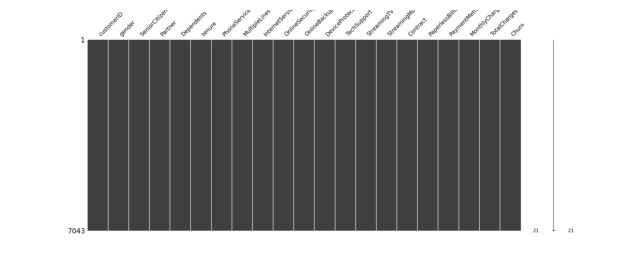

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [15]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['matrix_plot'],
)


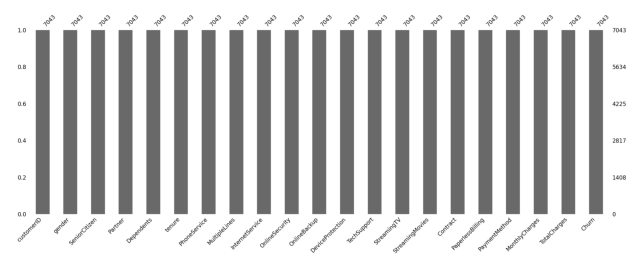

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [16]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['bar_plot'],
)

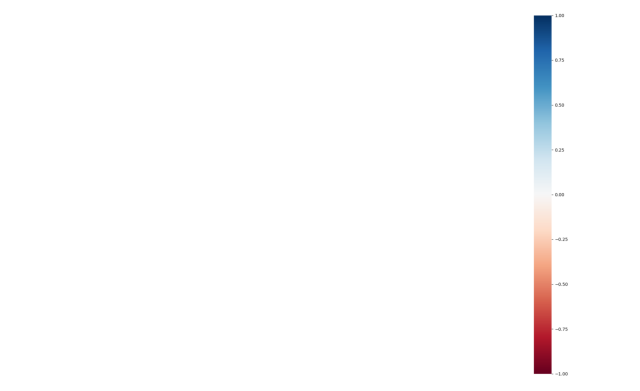

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [17]:
matplotlib_from_base64(
    exploratory_agent.get_artifacts()['heatmap_plot'],
)

#### Example 4: Correlation Funnel Tool

In [18]:
exploratory_agent.invoke_agent(
    user_instructions="Use the correlation funnel tool to analyze the dataset. Use the Churn feature as the target. Use Churn=Yes as the bin index to compare against.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: correlation_funnel


/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev/lib/python3.10/site-packages/polars/_cpu_check.py:232: RuntimeWarning: Missing required CPU features.

The following required CPU features were not detected:
    avx, fma
Continuing to use this version of Polars on this processor will likely result in a crash.
Install the `polars-lts-cpu` package instead of `polars` to run Polars with better compatibility.

Hint: If you are on an Apple ARM machine (e.g. M1) this is likely due to running Python under Rosetta.
It is recommended to install a native version of Python that does not run under Rosetta x86-64 emulation.

If you believe this warning to be a false positive, you can set the `POLARS_SKIP_CPU_CHECK` environment variable to bypass this check.

/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 7 x 6.0 in image.
/Users/mdancho/opt/anaconda3/envs/ds4b_301p_dev/lib/python3.10/site-packages/plotnine/ggplot.py:588: Pl

    * POST-PROCESSING EDA RESULTS


The correlation funnel analysis has been successfully computed using the Pearson method for the target level 'Churn__Yes'. The base target was 'Churn'. If you need further insights or visualizations from this analysis, please let me know!

In [20]:
exploratory_agent.get_artifacts().keys()

dict_keys(['correlation_data', 'plot_image', 'plotly_figure'])

In [21]:
pd.DataFrame(exploratory_agent.get_artifacts()['correlation_data'])

,feature,bin,correlation
0,Churn,Yes,1.000000
1,Churn,No,-1.000000
2,Contract,Month-to-month,0.405103
3,OnlineSecurity,No,0.342637
4,TechSupport,No,0.337281
5,tenure,0.0_9.0,0.314720
6,InternetService,Fiber optic,0.308020
7,Contract,Two year,-0.302253
8,PaymentMethod,Electronic check,0.301919
9,OnlineBackup,No,0.268005


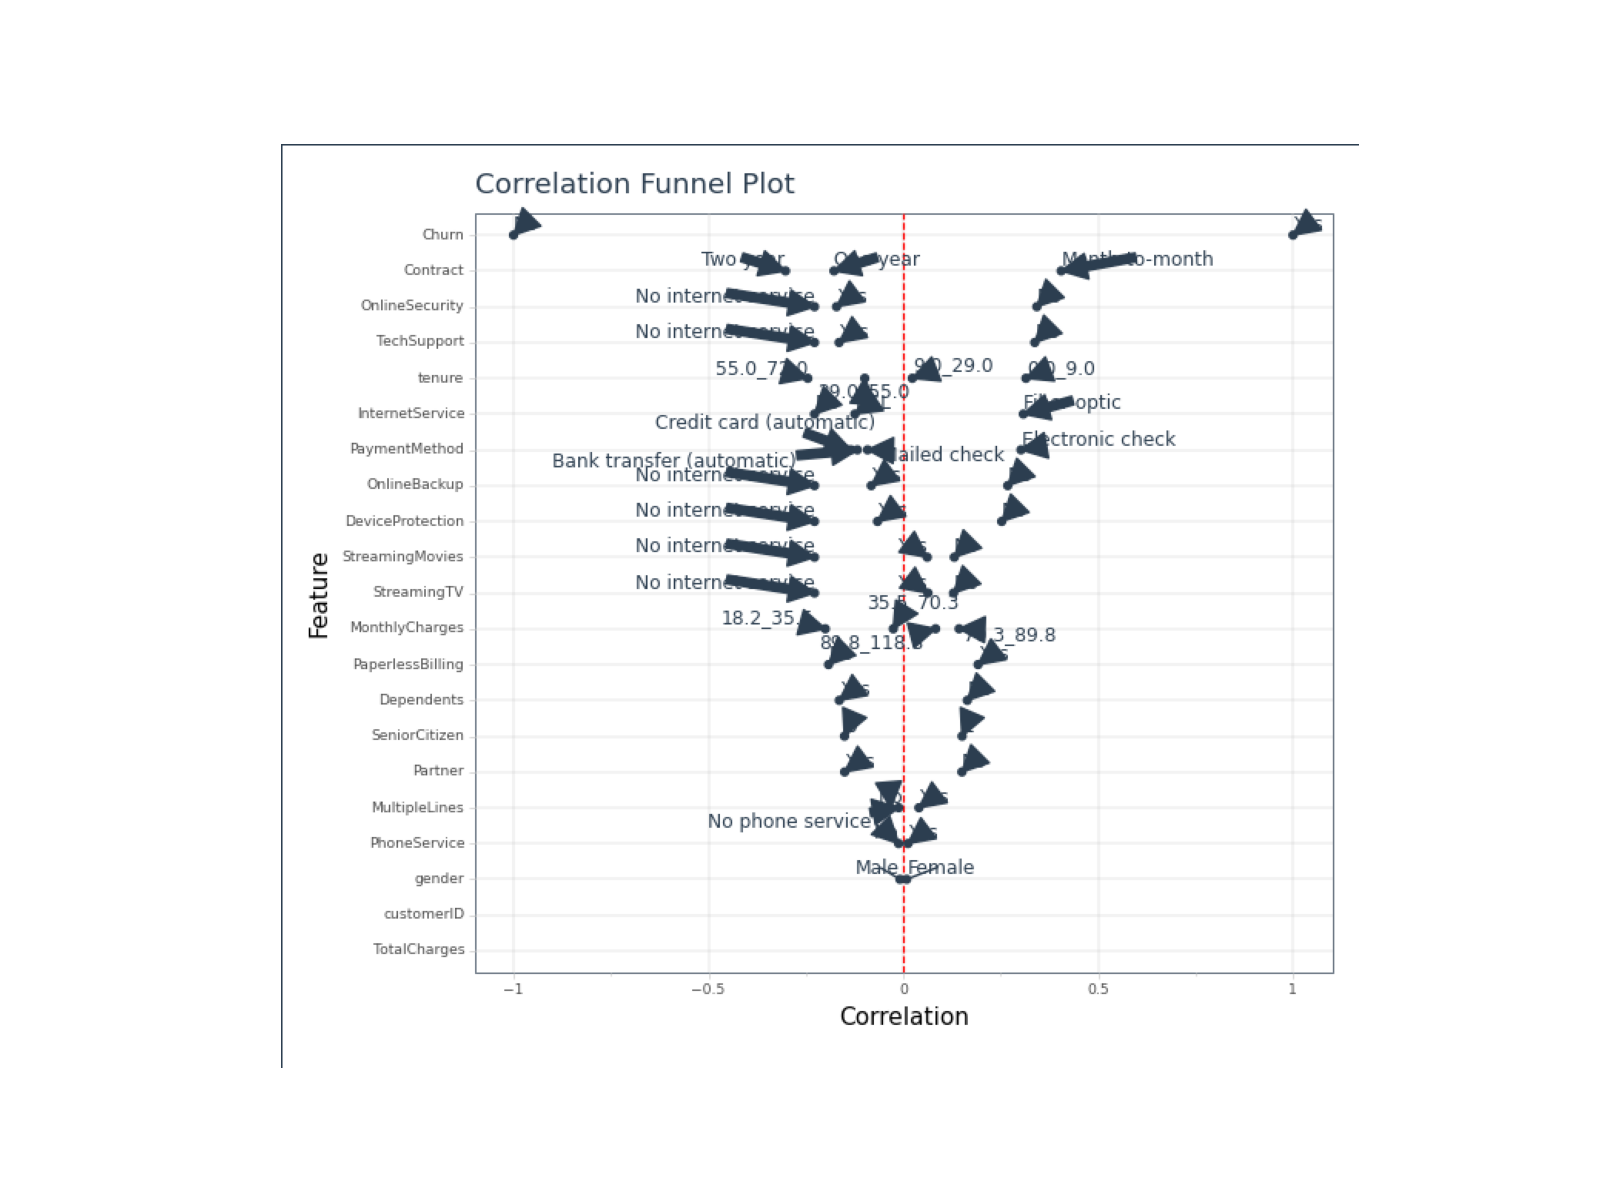

(<Figure size 800x600 with 1 Axes>, <Axes: >)

In [ ]:
matplotlib_from_base64(exploratory_agent.get_artifacts()['plot_image'])

In [23]:
plotly_from_dict(exploratory_agent.get_artifacts()['plotly_figure'])

![Correlation Funnel](../img/ds_agents/correlation_funnel.jpg)

#### Example 5: Sweetviz Tool

In [5]:
exploratory_agent.invoke_agent(
    user_instructions="Generate a Sweetviz report for the dataset. Use the Churn feature as the target.",
    data_raw=df,
)
exploratory_agent.get_ai_message(markdown=True)

---EXPLORATORY DATA ANALYST AGENT----
    * RUN REACT TOOL-CALLING AGENT FOR EDA
    * Tool: generate_sweetviz_report
    * Using temporary directory: /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpvwcmahwt


                                             |          | [  0%]   00:00 -> (? left)

Report /var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpvwcmahwt/sweetviz_report.html was generated.
    * POST-PROCESSING EDA RESULTS


The Sweetviz EDA report has been generated with the "Churn" feature as the target. You can download the report [here](sandbox:/var/folders/3s/bjq91lxs0jq9_zcw2q4l95gh0000gn/T/tmpvwcmahwt/sweetviz_report.html).

In [6]:
exploratory_agent.get_artifacts().keys()

dict_keys(['report_file', 'report_html'])

In [7]:
open_html_file_in_browser(exploratory_agent.get_artifacts()['report_file'])

![Sweetviz Report](../img/ds_agents/sweetviz_report.jpg)

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)